In [151]:
import json

# Let's see if we can access the prediction for on image as an example for planning
master_json = "predictions_dict_master_fullnogeo.json"

with open(master_json, "r") as f:
    data = json.load(f)
    json_string = json.dumps(data['predictions'][55363], indent=3)

print(json_string)

{
   "filepath": "images/batch_5/bada276600ce2790b1d2877e7d6e7a25.jpg",
   "classifications": {
      "classes": [
         "96fe1a07-7ef1-4a2f-99e1-ec2c9a78b532;aves;pelecaniformes;ardeidae;ardea;herodias;great blue heron",
         "bfa75aeb-3187-48fe-95b9-f171465cc984;aves;pelecaniformes;ardeidae;ardea;cocoi;cocoi heron",
         "b1352069-a39c-4a84-a949-60044271c0c1;aves;;;;;bird",
         "f8db21f0-6b79-4444-8be4-b87906d56e6a;aves;pelecaniformes;ardeidae;ardea;albus;great egret",
         "1110460b-7f99-405b-a9b0-65a09ecccca1;aves;pelecaniformes;ardeidae;tigrisoma;lineatum;rufescent tiger-heron"
      ],
      "scores": [
         0.7359567880630493,
         0.07253273576498032,
         0.04953608289361,
         0.03795544430613518,
         0.008134812116622925
      ]
   },
   "detections": [
      {
         "category": "1",
         "label": "animal",
         "conf": 0.8977401256561279,
         "bbox": [
            0.0,
            0.0,
            0.3460410535335541,


In [210]:
# Let's see if we can access the prediction for each image
_CONF = 0.4 # Master Setting for confidence or score threshold

# Function for pairing classification and score
def get_high_score_classes(scores, classes, threshold=_CONF):
    return [{"score": f'{score:.2f}', "class": cls} for score, cls in zip(scores, classes) if score > threshold]

# Function for pairing detection and score
def get_high_conf_detections(detections, target_label, threshold=_CONF):
    return [(f'{det["conf"]:2f}', det["label"]) for det in detections if det["label"] == target_label and det["conf"] > threshold]

# Staged Configuration
master_data = []

# Open and loop over json file
with open(master_json, "r") as f:
    data = json.load(f)
    for image in data["predictions"]:
        high_score_classes = get_high_score_classes(
            image["classifications"]["scores"],
            image["classifications"]["classes"],
            _CONF
        )
        master_data.append({
            "imageName": image["filepath"].split("/")[2],
            "nDetections_animal": len(get_high_conf_detections(image["detections"], "animal", _CONF)),
            "nDetections_human": len(get_high_conf_detections(image["detections"], "human", _CONF)),
            "nDetections_vehicle": len(get_high_conf_detections(image["detections"], "vehicle", _CONF)),
            "nClassifications": len(high_score_classes),
            "highScoreClasses": high_score_classes

        })

# Previous work identified 55363 as our heron example index - 
display(master_data[55363])
    

{'imageName': 'bada276600ce2790b1d2877e7d6e7a25.jpg',
 'nDetections_animal': 1,
 'nDetections_human': 0,
 'nDetections_vehicle': 0,
 'nClassifications': 1,
 'highScoreClasses': [{'score': '0.74',
   'class': '96fe1a07-7ef1-4a2f-99e1-ec2c9a78b532;aves;pelecaniformes;ardeidae;ardea;herodias;great blue heron'}]}

In [211]:
# When ready, convert the list of dicts to a dataframe
import pandas as pd

# Create Dataframe
df = pd.DataFrame(master_data)

# Check Quality
print(f'{len(df)} Images in Dataset')
print(" Dataset Head ")
with pd.option_context('display.max_colwidth', None):
    display(df[df['nClassifications']>1].head())
    display(df.describe())

104937 Images in Dataset
 Dataset Head 


,imageName,nDetections_animal,nDetections_human,nDetections_vehicle,nClassifications,highScoreClasses
441,011c2dfce6e67f6acffbbdc35c5bbff8.jpg,0,0,0,2,"[{'score': '0.55', 'class': 'e2895ed5-780b-48f6-8a11-9e27cb594511;;;;;;vehicle'}, {'score': '0.43', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"
880,d0592c0abefd9faa19b157b798572bc1.jpg,0,4,0,2,"[{'score': '0.49', 'class': '990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human'}, {'score': '0.46', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"
1466,4a1bc6fcefea72f6443d2e74a9149edf.jpg,0,0,0,2,"[{'score': '0.53', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}, {'score': '0.43', 'class': '990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human'}]"
2375,e7d751be8785648096e81429f486d136.jpg,0,1,0,2,"[{'score': '0.56', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}, {'score': '0.43', 'class': '990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human'}]"
2787,f6af404729be8ef7a4346cb441bdfd44.jpg,0,3,0,2,"[{'score': '0.51', 'class': '990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human'}, {'score': '0.46', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"


,nDetections_animal,nDetections_human,nDetections_vehicle,nClassifications
count,104937.000000,104937.000000,104937.000000,104937.000000
mean,0.404052,0.119710,0.036860,0.975214
std,1.182079,0.597176,0.194883,0.192846
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,13.000000,18.000000,5.000000,2.000000


In [212]:
# example image of blue heron converted to df
selected_row = df[df['imageName'] == 'bada276600ce2790b1d2877e7d6e7a25.jpg']

display(selected_row)

,imageName,nDetections_animal,nDetections_human,nDetections_vehicle,nClassifications,highScoreClasses
55363,bada276600ce2790b1d2877e7d6e7a25.jpg,1,0,0,1,"[{'score': '0.74', 'class': '96fe1a07-7ef1-4a2..."


In [213]:
# df before explosion

with pd.option_context('display.max_colwidth', None):
    display(df)

# Now let's explode the classes tuples so we have a row per high confidence class - noting that the counts are not per class but for total detection type in image
df2 = df.explode("highScoreClasses", ignore_index=True)


with pd.option_context('display.max_colwidth', None):
    display(df2[df2['nClassifications'] > 1 ])
    display(df2.info())

,imageName,nDetections_animal,nDetections_human,nDetections_vehicle,nClassifications,highScoreClasses
0,c89e327383d91bdaadda59e65c57eec8.jpg,0,0,0,1,"[{'score': '1.00', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"
1,8071eb10b23bdda01af32fb564c6446b.jpg,0,0,0,1,"[{'score': '0.98', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"
2,62c2182b59a70270579d7aa09fab3e6c.jpg,0,0,0,1,"[{'score': '0.99', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"
3,956d8f9f18208168bb30bbac9299bb59.jpg,0,0,0,1,"[{'score': '1.00', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"
4,15eb3dca11fbd0e6cc8366ffd08ed8ec.jpg,0,0,0,1,"[{'score': '0.98', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"
...,...,...,...,...,...,...
104932,e4843881c61b420c9fd7f9553147f02c.jpg,0,0,0,1,"[{'score': '0.98', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"
104933,454693c253f8c3b5cbed4bffdc375418.jpg,0,0,0,1,"[{'score': '1.00', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"
104934,dfb8ea06557ae1a7b64d390c68bb96c0.jpg,0,0,0,1,"[{'score': '1.00', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"
104935,8a46e8084f8b78053704864bc2c2fe0c.jpg,0,0,0,1,"[{'score': '1.00', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}]"


,imageName,nDetections_animal,nDetections_human,nDetections_vehicle,nClassifications,highScoreClasses
441,011c2dfce6e67f6acffbbdc35c5bbff8.jpg,0,0,0,2,"{'score': '0.55', 'class': 'e2895ed5-780b-48f6-8a11-9e27cb594511;;;;;;vehicle'}"
442,011c2dfce6e67f6acffbbdc35c5bbff8.jpg,0,0,0,2,"{'score': '0.43', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}"
881,d0592c0abefd9faa19b157b798572bc1.jpg,0,4,0,2,"{'score': '0.49', 'class': '990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human'}"
882,d0592c0abefd9faa19b157b798572bc1.jpg,0,4,0,2,"{'score': '0.46', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}"
1468,4a1bc6fcefea72f6443d2e74a9149edf.jpg,0,0,0,2,"{'score': '0.53', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}"
...,...,...,...,...,...,...
105532,6ffae1393f30dd12796efe754159bdf0.jpg,0,1,0,2,"{'score': '0.48', 'class': '990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human'}"
105554,e702e30d0972c5df5f8c2dc60a781662.jpg,0,2,2,2,"{'score': '0.54', 'class': '990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human'}"
105555,e702e30d0972c5df5f8c2dc60a781662.jpg,0,2,2,2,"{'score': '0.43', 'class': 'f1856211-cfb7-4a5b-9158-c0f72fd09ee6;;;;;;blank'}"
105609,55db2544d68f5ad45f8c97c87e894772.jpg,0,3,0,2,"{'score': '0.50', 'class': '990ae9dd-7a59-4344-afcb-1b7b21368000;mammalia;primates;hominidae;homo;sapiens;human'}"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105620 entries, 0 to 105619
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   imageName            105620 non-null  object
 1   nDetections_animal   105620 non-null  int64 
 2   nDetections_human    105620 non-null  int64 
 3   nDetections_vehicle  105620 non-null  int64 
 4   nClassifications     105620 non-null  int64 
 5   highScoreClasses     102336 non-null  object
dtypes: int64(4), object(2)
memory usage: 4.8+ MB


None

In [214]:
# Split by ';' and take the last part
df2['class'] = df2['highScoreClasses'].apply(lambda d: d.get('class') if isinstance(d, dict) else None).str.split(";").str[-1]

df2 = df2.drop('highScoreClasses', axis=1)

df2.head()

,imageName,nDetections_animal,nDetections_human,nDetections_vehicle,nClassifications,class
0,c89e327383d91bdaadda59e65c57eec8.jpg,0,0,0,1,blank
1,8071eb10b23bdda01af32fb564c6446b.jpg,0,0,0,1,blank
2,62c2182b59a70270579d7aa09fab3e6c.jpg,0,0,0,1,blank
3,956d8f9f18208168bb30bbac9299bb59.jpg,0,0,0,1,blank
4,15eb3dca11fbd0e6cc8366ffd08ed8ec.jpg,0,0,0,1,blank


In [215]:
# Save the df as a csv
df2.to_csv("classified_images.csv")

### Classifed Images Starting Point

In [216]:
import pandas as pd

# Reload the classified images
df2 = pd.read_csv("classified_images.csv")

C:\Users\mores\AppData\Local\Temp\ipykernel_22836\950002085.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=counts, x='class', y='count', palette='viridis', ax=ax)
C:\Users\mores\AppData\Local\Temp\ipykernel_22836\950002085.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


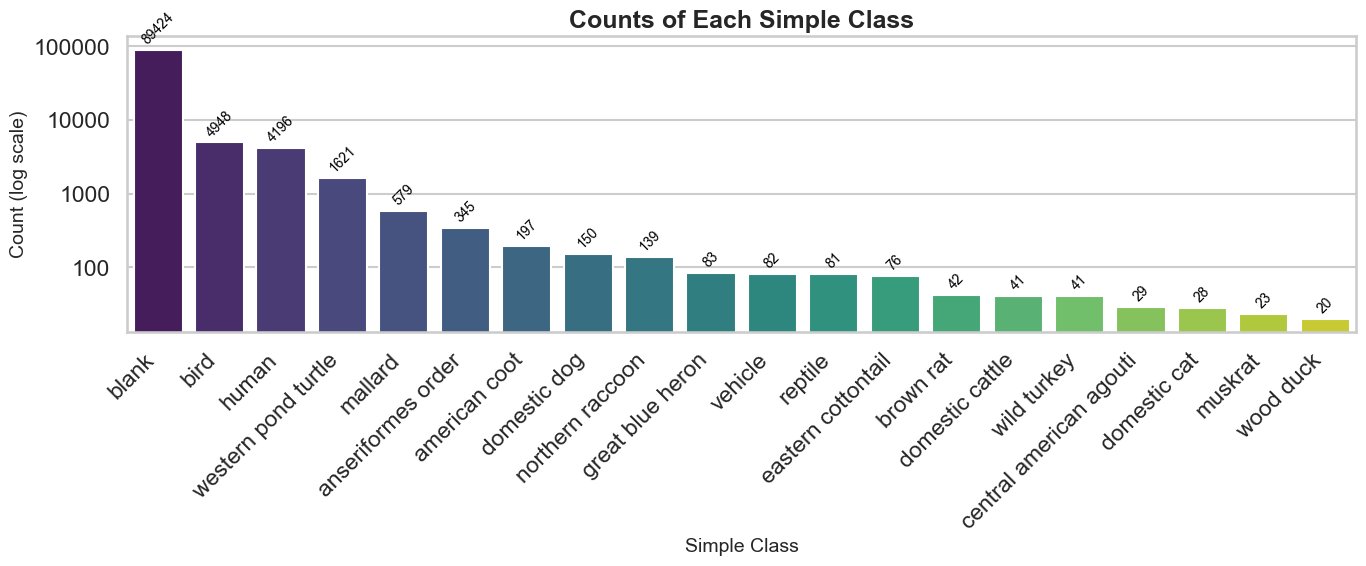

In [217]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

# Filter data as you did
df3 = df2[~df2["class"].isin([])]

# Get top 20 counts
counts = df3["class"].value_counts().iloc[:20].reset_index()
counts.columns = ['class', 'count']

# Set Seaborn style and context for better visuals
sns.set(style="whitegrid", context="talk")

# Create figure and axis with larger size
fig, ax = plt.subplots(figsize=(14, 6))

# Create barplot with a nice color palette
sns.barplot(data=counts, x='class', y='count', palette='viridis', ax=ax)

# Log scale for y-axis
ax.set_yscale('log')

# Format y-axis ticks as integers, no scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)

# Title and labels with better font sizes
ax.set_title("Counts of Each Simple Class", fontsize=18, weight='bold')
ax.set_xlabel("Simple Class", fontsize=14)
ax.set_ylabel("Count (log scale)", fontsize=14)

# Rotate x-ticks for readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add count labels above bars with vertical alignment and smaller font
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height * 1.1,  # slightly above bar top
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10,
        rotation=45,
        color='black'
    )

plt.tight_layout()
plt.show()



In [218]:
# Create a table of counts
counts_table = df3["class"].value_counts().reset_index()
counts_table.columns = ["class", "count"]

def format_pct(x):
    if x < 0.1: return f'{x:.3f}' 
    elif x < 1: return f'{x:.2f}' 
    else: return f'{x:.1f}'

counts_table["%"] = (counts_table["count"]/len(df3) * 100).map(format_pct)
counts_table.index = counts_table.index + 1

# Save the table so we can figure out an error rate
counts_table.to_csv("simple_class_counts.csv")

# Display the table
top_20_classes = counts_table[:20]
top_20_classes


,class,count,%
1,blank,89424,84.7
2,bird,4948,4.7
3,human,4196,4.0
4,western pond turtle,1621,1.5
5,mallard,579,0.55
6,anseriformes order,345,0.33
7,american coot,197,0.19
8,domestic dog,150,0.14
9,northern raccoon,139,0.13
10,great blue heron,83,0.079


In [219]:
counts_table.tail(20)

,class,count,%
44,bushy-tailed woodrat,1,0.001
45,pronghorn,1,0.001
46,eastern red forest rat,1,0.001
47,snowy egret,1,0.001
48,domestic chicken,1,0.001
49,california quail,1,0.001
50,blood pheasant,1,0.001
51,white-lipped peccary,1,0.001
52,red acouchi,1,0.001
53,desert cottontail,1,0.001


In [220]:
# Create a mediaID column by splitting on '.' and taking the first part
df3['mediaID'] = df3['imageName'].str.split('.').str[0]
df3.head()

,Unnamed: 0,imageName,nDetections_animal,nDetections_human,nDetections_vehicle,nClassifications,class,mediaID
0,0,c89e327383d91bdaadda59e65c57eec8.jpg,0,0,0,1,blank,c89e327383d91bdaadda59e65c57eec8
1,1,8071eb10b23bdda01af32fb564c6446b.jpg,0,0,0,1,blank,8071eb10b23bdda01af32fb564c6446b
2,2,62c2182b59a70270579d7aa09fab3e6c.jpg,0,0,0,1,blank,62c2182b59a70270579d7aa09fab3e6c
3,3,956d8f9f18208168bb30bbac9299bb59.jpg,0,0,0,1,blank,956d8f9f18208168bb30bbac9299bb59
4,4,15eb3dca11fbd0e6cc8366ffd08ed8ec.jpg,0,0,0,1,blank,15eb3dca11fbd0e6cc8366ffd08ed8ec


In [221]:
# Let's rejoin the test medias and predictions based on imageName

metadata = pd.read_csv("ur_test_medias.csv")
predicts = df3.copy()

print(" ======== df('METADATA') ======== ")
metadata.info()

print(" ======== df('PREDICTS') ======== ")
predicts.info()

 ======== df('METADATA') ======== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105163 entries, 0 to 105162
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   mediaID     105163 non-null  object
 1   timestamp   105163 non-null  object
 2   publicURL   105163 non-null  object
 3   fileName    105163 non-null  object
 4   folderName  105163 non-null  object
dtypes: object(5)
memory usage: 4.0+ MB
 ======== df('PREDICTS') ======== 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105620 entries, 0 to 105619
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           105620 non-null  int64 
 1   imageName            105620 non-null  object
 2   nDetections_animal   105620 non-null  int64 
 3   nDetections_human    105620 non-null  int64 
 4   nDetections_vehicle  105620 non-null  int64 
 5   nClassifications     105620 

In [222]:
# The metadata might have duplicate entries due to image uploading bugs - so before joining we're going to remove those.
metadata_unique = metadata.drop_duplicates(subset=['mediaID'])
print(metadata_unique['mediaID'].value_counts().max())  # max number of duplicates in metadata
print(predicts['mediaID'].value_counts().max())  # max number of duplicates in predicts

1
2


In [223]:
# Merge them based on a column name (a join would be on the index and not appropriate in this case)
merged_df = pd.merge(metadata_unique, predicts, on="mediaID", how="inner")

# Check number of rows didn't change
print(f"n rows in predictions: {len(predicts)}")
print(f"n rows in predictions: {len(merged_df)}")

with pd.option_context('display.max_colwidth', None):
    print("\n Before selection")
    display(merged_df.tail())

# Let's select the columns we care about
cols = ['mediaID', 'timestamp', 'publicURL', 'folderName', 'nDetections_animal', 'nDetections_human', 'nDetections_vehicle', 'class'] # exlude nClassifications now because we exploded
df_clean = merged_df[cols]

with pd.option_context('display.max_colwidth', None):
    print("\n After selection")
    display(df_clean.tail())

df_clean.to_csv('merged_df.csv')


n rows in predictions: 105620
n rows in predictions: 105620

 Before selection


,mediaID,timestamp,publicURL,fileName,folderName,Unnamed: 0,imageName,nDetections_animal,nDetections_human,nDetections_vehicle,nClassifications,class
105615,113f9bb59e434d5e52dc6ee63efb39b0,2024-12-25 15:29:24,https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/100MEDIA/SYFW01868.jpg,SYFW01868.jpg,2025-01-04_UR027,99719,113f9bb59e434d5e52dc6ee63efb39b0.jpg,0,1,0,1,human
105616,871315ba0ab9f2958417e2a6533cd6de,2024-12-25 15:29:24,https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/100MEDIA/SYFW01869.jpg,SYFW01869.jpg,2025-01-04_UR027,95269,871315ba0ab9f2958417e2a6533cd6de.jpg,0,1,0,1,human
105617,991baedeb69e7459d6bd6813c041a9db,2024-12-25 15:29:24,https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/100MEDIA/SYFW01870.jpg,SYFW01870.jpg,2025-01-04_UR027,97510,991baedeb69e7459d6bd6813c041a9db.jpg,0,1,0,1,human
105618,32c8912bf29b67263f4f5c416ae6f68c,2024-12-25 15:29:26,https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/100MEDIA/SYFW01871.jpg,SYFW01871.jpg,2025-01-04_UR027,101434,32c8912bf29b67263f4f5c416ae6f68c.jpg,0,0,0,1,blank
105619,f4ba4a3d6ad961a852cb5bccd2f08d0a,2024-12-25 15:29:26,https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/100MEDIA/SYFW01872.jpg,SYFW01872.jpg,2025-01-04_UR027,96310,f4ba4a3d6ad961a852cb5bccd2f08d0a.jpg,0,0,0,1,blank



 After selection


,mediaID,timestamp,publicURL,folderName,nDetections_animal,nDetections_human,nDetections_vehicle,class
105615,113f9bb59e434d5e52dc6ee63efb39b0,2024-12-25 15:29:24,https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/100MEDIA/SYFW01868.jpg,2025-01-04_UR027,0,1,0,human
105616,871315ba0ab9f2958417e2a6533cd6de,2024-12-25 15:29:24,https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/100MEDIA/SYFW01869.jpg,2025-01-04_UR027,0,1,0,human
105617,991baedeb69e7459d6bd6813c041a9db,2024-12-25 15:29:24,https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/100MEDIA/SYFW01870.jpg,2025-01-04_UR027,0,1,0,human
105618,32c8912bf29b67263f4f5c416ae6f68c,2024-12-25 15:29:26,https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/100MEDIA/SYFW01871.jpg,2025-01-04_UR027,0,0,0,blank
105619,f4ba4a3d6ad961a852cb5bccd2f08d0a,2024-12-25 15:29:26,https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/100MEDIA/SYFW01872.jpg,2025-01-04_UR027,0,0,0,blank


## Where nothing was detected - was something in the shot?

For images where classification was missing - pulling a random set and looking to see if there was really nothing

In [224]:
# Let's take a look at images where classifications is NaN
from IPython.display import Image, display, HTML
import random

nan_class_df = merged_df[ (merged_df["nClassifications"] == 0) & (merged_df["nDetections_animal"] == 0)]

# pick a subset of 5
sampled_df = nan_class_df.sample(n=9, random_state=42)  # set seed for reproducibility

# Create HTML to display images in a grid
html_str = '<div style="max-width: 900px; display: flex; flex-wrap: wrap; gap: 10px;">'

for i, row in sampled_df.iterrows():
    url = row["publicURL"]
    caption = f'{row["folderName"]}| n_ani: {row["nDetections_animal"]}, n_hum: {row["nDetections_human"]}, n_veh: {row["nDetections_vehicle"]}'

    img_html = f'''
    <div style="flex: 1 0 30%; text-align: left;">
        <div style="margin-top: 4px; font-size: 12px; color: #ccc">{caption}</div>
        <a href="{url}" target="_blank">
            <img src="{url}" style="max-width: 100%; height: auto; max-height: 150px; border: 1px solid #ccc;"/>
        </a>
    </div>
    '''
    html_str += img_html

html_str += '</div>'

display(HTML(html_str))


Clearly there are some mistakes  
There are 3 photos in this "no animals detected" set that very much have animals in them - and some cute ones too!

## What is being labeled as an American Coot?

In [225]:
# Let's take a look at images where classifications is NaN
from IPython.display import Image, display, HTML
import random

coot_class_df = merged_df[ (merged_df["class"] == "american coot")]
print(f'N coot class: {len(coot_class_df)}')

# pick a subset of 5
sampled_df = coot_class_df.sample(n=9, random_state=42)  # set seed for reproducibility

# Create HTML to display images in a grid
html_str = '<div style="max-width: 900px; display: flex; flex-wrap: wrap; gap: 10px;">'

for i, row in sampled_df.iterrows():
    url = row["publicURL"]
    caption = f'{row["folderName"]}| class: {row["class"]}'

    img_html = f'''
    <div style="flex: 1 0 30%; text-align: left;">
        <div style="margin-top: 4px; font-size: 12px; color: #ccc">{caption}</div>
        <a href="{url}" target="_blank">
            <img src="{url}" style="max-width: 100%; height: auto; max-height: 150px; border: 1px solid #ccc;"/>
        </a>
    </div>
    '''
    html_str += img_html

html_str += '</div>'

display(HTML(html_str))


N coot class: 197


Clearly noot any coots.

In [226]:
# Let's take a look at images where classifications is NaN
from IPython.display import Image, display, HTML
import random

gbh_class_df = merged_df[ (merged_df["class"] == "great blue heron")]
print(f'N gbh class: {len(gbh_class_df)}')

# pick a subset of 5
sampled_df = gbh_class_df.sample(n=9, random_state=42)  # set seed for reproducibility

# Create HTML to display images in a grid
html_str = '<div style="max-width: 900px; display: flex; flex-wrap: wrap; gap: 10px;">'

for i, row in sampled_df.iterrows():
    url = row["publicURL"]
    caption = f'{row["folderName"]}| class: {row["class"]}'

    img_html = f'''
    <div style="flex: 1 0 30%; text-align: left;">
        <div style="margin-top: 4px; font-size: 12px; color: #ccc">{caption}</div>
        <a href="{url}" target="_blank">
            <img src="{url}" style="max-width: 100%; height: auto; max-height: 150px; border: 1px solid #ccc;"/>
        </a>
    </div>
    '''
    html_str += img_html

html_str += '</div>'

display(HTML(html_str))


N gbh class: 83


awesome panel of blue herons

## Time for some EDA statistics

Shape, Nulls, Summaries, Duplicates Etc


In [227]:
# Let's explore the merged df
import numpy as np
# import pandas as pd # Already imported above, uncomment if starting over here.
import seaborn as sns
import matplotlib.pyplot as plt

# Overview of shape
print("============== Shape ==============") 
rows, cols = merged_df.shape
print(f'Rows: {rows}, Cols: {cols}')

# Data types and non-null counts
print("\n============== Info ==============") 
merged_df.info()

# Peek at the first few rows
print("\n============== Head ==============")
#temporaly set expand_frame_repr
with pd.option_context('expand_frame_repr', False):
    print(merged_df.head())

# Basic summary stats (numeric columns only)
print("\n============== Describe ==============")
with pd.option_context('expand_frame_repr', False):
    print(merged_df.describe())



============== Shape ==============
Rows: 105620, Cols: 12

============== Info ==============
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105620 entries, 0 to 105619
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   mediaID              105620 non-null  object
 1   timestamp            105620 non-null  object
 2   publicURL            105620 non-null  object
 3   fileName             105620 non-null  object
 4   folderName           105620 non-null  object
 5   Unnamed: 0           105620 non-null  int64 
 6   imageName            105620 non-null  object
 7   nDetections_animal   105620 non-null  int64 
 8   nDetections_human    105620 non-null  int64 
 9   nDetections_vehicle  105620 non-null  int64 
 10  nClassifications     105620 non-null  int64 
 11  class                102336 non-null  object
dtypes: int64(5), object(7)
memory usage: 9.7+ MB

============== Head ==============
        

In [228]:
# Total missing values per column
print("\nMissing values:")
print(merged_df.isnull().sum())

# Percentage of missing values
print("\nMissing value %:")
print((merged_df.isnull().mean() * 100).sort_values(ascending=False))



Missing values:
mediaID                   0
timestamp                 0
publicURL                 0
fileName                  0
folderName                0
Unnamed: 0                0
imageName                 0
nDetections_animal        0
nDetections_human         0
nDetections_vehicle       0
nClassifications          0
class                  3284
dtype: int64

Missing value %:
class                  3.10926
mediaID                0.00000
publicURL              0.00000
timestamp              0.00000
fileName               0.00000
folderName             0.00000
imageName              0.00000
Unnamed: 0             0.00000
nDetections_animal     0.00000
nDetections_human      0.00000
nDetections_vehicle    0.00000
nClassifications       0.00000
dtype: float64


For those score, class, and simple class that are missing - this is expected because the three columns are all related from root:  
"score: {score}, class: {class}" and simple_class is {class}[-1]

C:\Users\mores\AppData\Local\Temp\ipykernel_22836\4219143720.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.isnull().sum())


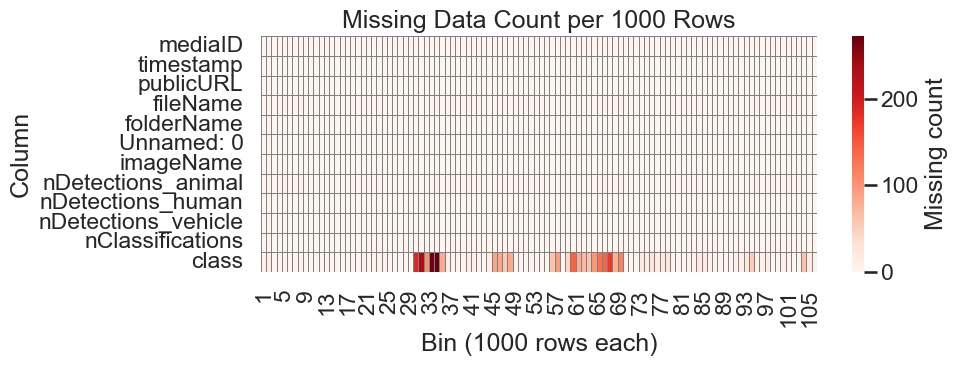

In [229]:
# Create a bin index for every 1000 rows
bin_size = 1000
# n_bins = int(np.ceil(len(merged_df) / bin_size))
merged_df['bin'] = (np.arange(len(merged_df)) // bin_size) + 1

# Count missing values per column for each bin
missing_per_bin = (
    merged_df
    .groupby('bin')
    .apply(lambda x: x.isnull().sum())
    .drop(columns='bin')
)

# Plot heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(missing_per_bin.T, cmap="Reds", cbar_kws={'label': 'Missing count'}, linewidths=0.5, linecolor='gray')
plt.xlabel("Bin (1000 rows each)")

plt.ylabel("Column")
plt.title("Missing Data Count per 1000 Rows")
plt.tight_layout()
plt.show()

That the system struggled heavily with images in the 27k to 37k rows might indicate that the photos in one or more specific folders has an issue -  

For example, we know that at some point the small size image preview files were uploaded (the snapshots generally used in the app)  

Let's grab the URL path on a subset of these to confirm

In [230]:
# missing class subset
missing_class_urls = merged_df[merged_df['class'].isnull()]["publicURL"]

with pd.option_context('display.max_colwidth', None):
  print(missing_class_urls)


56                      https://urbanriverrangers.s3.amazonaws.com/images/2024/2024-01-30_Learnin_platform_camera_test/DCIM/100MEDIA/SYFW0106.JPG
124                     https://urbanriverrangers.s3.amazonaws.com/images/2024/2024-01-30_Learnin_platform_camera_test/DCIM/100MEDIA/SYFW0229.JPG
162       https://urbanriverrangers.s3.amazonaws.com/images/2024/2024-01-31_LearningPlatformBeaver/2024-01-31_19-16-18/DCIM/100MEDIA/SYFW0058.JPG
258                           https://urbanriverrangers.s3.amazonaws.com/images/2024/2024-01-31_LearningPlatformBeaver/DCIM/100MEDIA/SYFW0176.JPG
293                           https://urbanriverrangers.s3.amazonaws.com/images/2024/2024-01-31_LearningPlatformBeaver/DCIM/100MEDIA/SYFW0244.JPG
                                                                           ...                                                                   
105460                                        https://urbanriverrangers.s3.amazonaws.com/images/2025/2025-01-04_UR027/DCIM/1

At first glance - these do not appear to be only related to clips or small resolution images - so in the mix there are truly no classes and some missed animals.

In [231]:
# Unique values per column (categorical)
for col in merged_df.select_dtypes(include='object'):
    print(f"\nColumn '{col}' unique values:")
    print(merged_df[col].value_counts(dropna=False))





Column 'mediaID' unique values:
mediaID
5eca14bca5c6e1e704aee0d3bd8b9930    2
57a23cb1213d77b8a659ad963602d601    2
00032e7b2344cc59b08219eff33e3ef9    2
342d5bf43ea99aa991109c40748988e5    2
882e3d2376b3e50ec905a7ecacd685f2    2
                                   ..
27aff126d581635cc9cf56642abc774f    1
46027732667b91ecc93c9535bc05d0fd    1
5f218d831aab351287f10c569640bbd0    1
4d1452037c722bc0b19f1ef71df4a658    1
ccd7e7b5f6156b8e6060e87b4b814eb2    1
Name: count, Length: 104937, dtype: int64

Column 'timestamp' unique values:
timestamp
2025-01-05 08:04:34    16
2024-12-17 18:19:26     8
2024-12-22 11:50:36     6
2024-11-04 00:33:44     5
2024-11-04 08:23:34     5
                       ..
2023-12-19 12:39:37     1
2023-12-19 12:39:51     1
2023-12-19 12:39:58     1
2023-12-19 12:42:00     1
2024-09-10 16:02:55     1
Name: count, Length: 91235, dtype: int64

Column 'publicURL' unique values:
publicURL
https://urbanriverrangers.s3.amazonaws.com/images/2024/2024-06-03_UR011/DCIM/100ME


Highly correlated features (>0.8):
            Unnamed: 0       bin
Unnamed: 0         NaN  0.989963
bin           0.989963       NaN


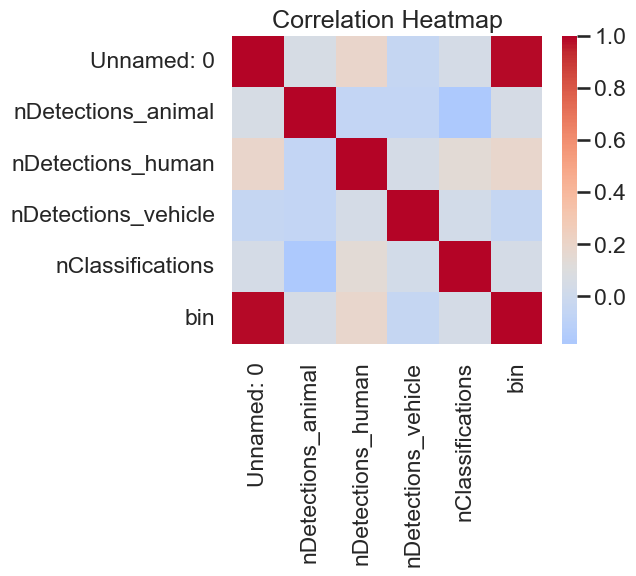

In [232]:
# Correlation matrix
corr_matrix = merged_df.select_dtypes(include='number').corr()

# Strong correlations (excluding 1.0)
strong_corr = corr_matrix[(abs(corr_matrix) > 0.8) & (abs(corr_matrix) < 1.0)]
print("\nHighly correlated features (>0.8):")
print(strong_corr.dropna(how='all').dropna(axis=1, how='all'))

# Visualize
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0.1)
plt.title("Correlation Heatmap")
plt.show()


In [233]:
# Convert the timstamp to datetime
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], errors='coerce')


print(merged_df.info())

merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105620 entries, 0 to 105619
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   mediaID              105620 non-null  object        
 1   timestamp            105620 non-null  datetime64[ns]
 2   publicURL            105620 non-null  object        
 3   fileName             105620 non-null  object        
 4   folderName           105620 non-null  object        
 5   Unnamed: 0           105620 non-null  int64         
 6   imageName            105620 non-null  object        
 7   nDetections_animal   105620 non-null  int64         
 8   nDetections_human    105620 non-null  int64         
 9   nDetections_vehicle  105620 non-null  int64         
 10  nClassifications     105620 non-null  int64         
 11  class                102336 non-null  object        
 12  bin                  105620 non-null  int64         
dtypes: datetime64[

,mediaID,timestamp,publicURL,fileName,folderName,Unnamed: 0,imageName,nDetections_animal,nDetections_human,nDetections_vehicle,nClassifications,class,bin
0,fb04201b6417ea917fdd24e1a7415d8a,2024-01-27 13:33:15,https://urbanriverrangers.s3.amazonaws.com/ima...,SYFW0060.JPG,2024-01-30_prologis_02,4780,fb04201b6417ea917fdd24e1a7415d8a.jpg,0,1,0,1,human,1
1,c112813a5f3b9cec26f95fad982b8d09,2024-01-24 18:56:50,https://urbanriverrangers.s3.amazonaws.com/ima...,SYFW0001.JPG,2024-01-30_Learnin_platform_camera_test,2249,c112813a5f3b9cec26f95fad982b8d09.jpg,0,0,0,1,blank,1
2,0647380f2d59692f5b2b642312844e9f,2024-01-24 19:01:54,https://urbanriverrangers.s3.amazonaws.com/ima...,SYFW0002.JPG,2024-01-30_Learnin_platform_camera_test,1746,0647380f2d59692f5b2b642312844e9f.jpg,0,1,0,1,human,1
3,0db73c6c1efb4968c04a47e418ebeefb,2024-01-24 19:03:05,https://urbanriverrangers.s3.amazonaws.com/ima...,SYFW0004.JPG,2024-01-30_Learnin_platform_camera_test,8188,0db73c6c1efb4968c04a47e418ebeefb.jpg,0,1,0,1,human,1
4,31fc53de29056b4dd8bc7b1804617f00,2024-01-24 19:04:19,https://urbanriverrangers.s3.amazonaws.com/ima...,SYFW0006.JPG,2024-01-30_Learnin_platform_camera_test,9985,31fc53de29056b4dd8bc7b1804617f00.jpg,0,1,0,1,human,1


In [234]:
# Let's split out time info so we can segment observations
merged_df['year'] = merged_df['timestamp'].dt.year
merged_df['month'] = merged_df['timestamp'].dt.month
merged_df['day'] = merged_df['timestamp'].dt.day
merged_df['hour'] = merged_df['timestamp'].dt.hour
merged_df['minute'] = merged_df['timestamp'].dt.minute
merged_df['second'] = merged_df['timestamp'].dt.second
merged_df['weekday'] = merged_df['timestamp'].dt.day_name()

# also make a shorthand weekday by recoding weekdays
weekday_map = {'Monday': 'Mon', 'Tuesday': 'Tue', 'Wednesday': 'Wed', 'Thursday': 'Thu', 'Friday': 'Fri', 'Saturday': 'Sat', 'Sunday': 'Sun'}

merged_df['weekday_short'] = merged_df['weekday'].map(weekday_map)


merged_df.head()

,mediaID,timestamp,publicURL,fileName,folderName,Unnamed: 0,imageName,nDetections_animal,nDetections_human,nDetections_vehicle,...,class,bin,year,month,day,hour,minute,second,weekday,weekday_short
0,fb04201b6417ea917fdd24e1a7415d8a,2024-01-27 13:33:15,https://urbanriverrangers.s3.amazonaws.com/ima...,SYFW0060.JPG,2024-01-30_prologis_02,4780,fb04201b6417ea917fdd24e1a7415d8a.jpg,0,1,0,...,human,1,2024,1,27,13,33,15,Saturday,Sat
1,c112813a5f3b9cec26f95fad982b8d09,2024-01-24 18:56:50,https://urbanriverrangers.s3.amazonaws.com/ima...,SYFW0001.JPG,2024-01-30_Learnin_platform_camera_test,2249,c112813a5f3b9cec26f95fad982b8d09.jpg,0,0,0,...,blank,1,2024,1,24,18,56,50,Wednesday,Wed
2,0647380f2d59692f5b2b642312844e9f,2024-01-24 19:01:54,https://urbanriverrangers.s3.amazonaws.com/ima...,SYFW0002.JPG,2024-01-30_Learnin_platform_camera_test,1746,0647380f2d59692f5b2b642312844e9f.jpg,0,1,0,...,human,1,2024,1,24,19,1,54,Wednesday,Wed
3,0db73c6c1efb4968c04a47e418ebeefb,2024-01-24 19:03:05,https://urbanriverrangers.s3.amazonaws.com/ima...,SYFW0004.JPG,2024-01-30_Learnin_platform_camera_test,8188,0db73c6c1efb4968c04a47e418ebeefb.jpg,0,1,0,...,human,1,2024,1,24,19,3,5,Wednesday,Wed
4,31fc53de29056b4dd8bc7b1804617f00,2024-01-24 19:04:19,https://urbanriverrangers.s3.amazonaws.com/ima...,SYFW0006.JPG,2024-01-30_Learnin_platform_camera_test,9985,31fc53de29056b4dd8bc7b1804617f00.jpg,0,1,0,...,human,1,2024,1,24,19,4,19,Wednesday,Wed


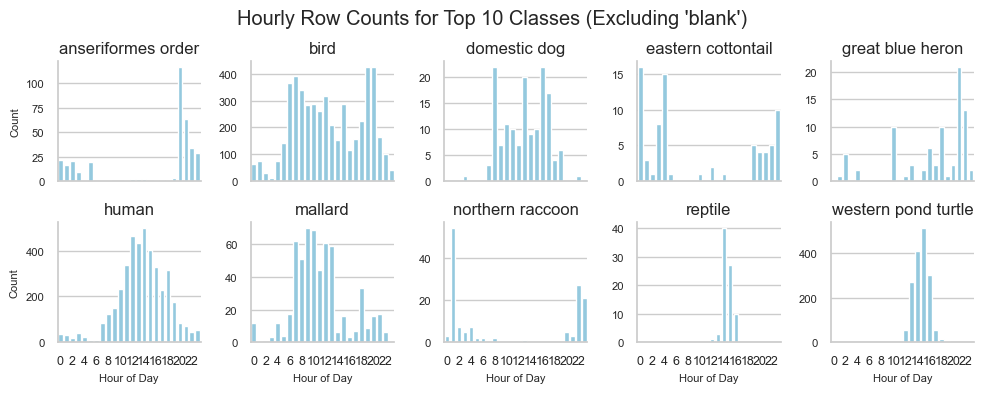

In [240]:
# Filter to top classes
filtered_df = merged_df[~merged_df['class'].isin(['blank', 'american coot', 'vehicle'])].copy()

# top 10 classes
top_classes = filtered_df['class'].value_counts().head(10).index

# Filter to top 10 classes only
top_df = filtered_df[filtered_df['class'].isin(top_classes)]

# Group by class and hour
grouped = (top_df.groupby(['class', 'hour']).size().reset_index(name='count'))

# Plot: one subplot per class
sns.set(style="whitegrid")
g = sns.FacetGrid(grouped, col='class', col_wrap=5, height=2, sharey=False, sharex=True)

g.map_dataframe(sns.barplot, x='hour', y='count', color='skyblue', order=range(24))
g.set_titles(col_template="{col_name}", fontsize=8)
g.set_axis_labels("Hour of Day", "Count", fontsize=8)

# Ensure x-axis ticks are visible and readable
for ax in g.axes.flatten():
    ax.set_xlabel("Hour of Day", fontsize=8)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xticks(range(0, 24, 2))
    ax.set_xticklabels([str(h) for h in range(0, 24, 2)], rotation=0)

g.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Hourly Row Counts for Top 10 Classes (Excluding 'blank')")
plt.show()

# birds and anseriformed (geese) show up mid day to early afternoon
In fact, each animal species tends to have an abundance shift to early in the afternoon between 15 to 19 hours ( 3 to 7pm )
Some braver species show up around noon and continue utnil about 7pm.

Same graph, but standardizing the axes to see relative abundance.

C:\Users\mores\AppData\Local\Temp\ipykernel_22836\712055627.py:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  .stack()


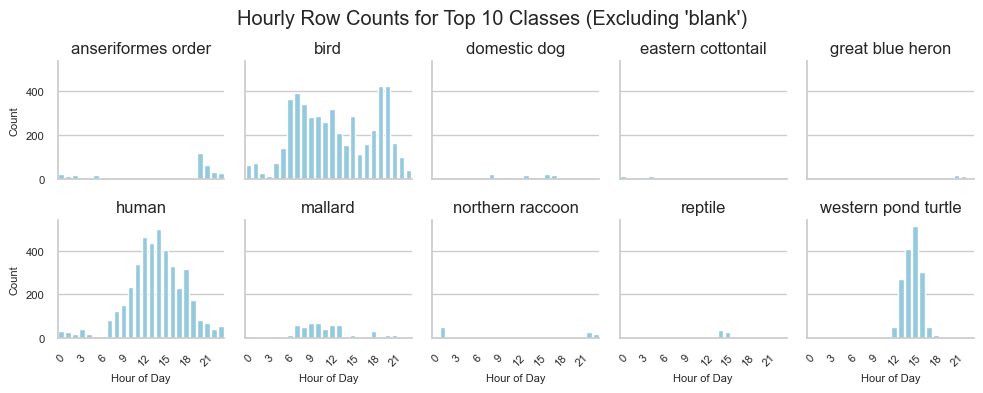

In [238]:
# Ensure all hour values (0–23) exist per class (fill missing with 0)
all_hours = pd.DataFrame({'hour': range(24)})
grouped_complete = (
    grouped
    .set_index(['class', 'hour'])
    .unstack(fill_value=0)
    .stack()
    .reset_index()
    .rename(columns={0: 'count'})
)

# Set style and shared y-axis
sns.set(style="whitegrid")
g = sns.FacetGrid(
    grouped_complete,
    col='class',
    col_wrap=5,
    height=2,
    sharey=True
)

# Plot bars with consistent x-axis ordering
g.map_dataframe(
    sns.barplot,
    x='hour',
    y='count',
    color='skyblue',
    order=list(range(24))
)

# Set titles and axis labels
g.set_titles(col_template="{col_name}", fontsize=8)
g.set_axis_labels("Hour of Day", "Count", fontsize=8)

# Ensure x-axis ticks are visible and readable
for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    ax.set_xticks(range(0, 24, 3))
    ax.set_xticklabels([str(h) for h in range(0, 24, 3)], rotation=45)

# Layout adjustments
g.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Hourly Row Counts for Top 10 Classes (Excluding 'blank')")
plt.show()

# There are definitely birds being detected at all times of day
anseriformed order is geese
in bird we find geese, other small birds, ducks, and the occasional off target
humans follow a normal pattern of activity peaking around noon

mallard specific happens all day with slight evening increase
western pond turtle happens all day with slight evening increase

Let's graph the top 10 classes by species - and show the total counts by day of week ( not normalized, just total )

<function matplotlib.pyplot.show(close=None, block=None)>

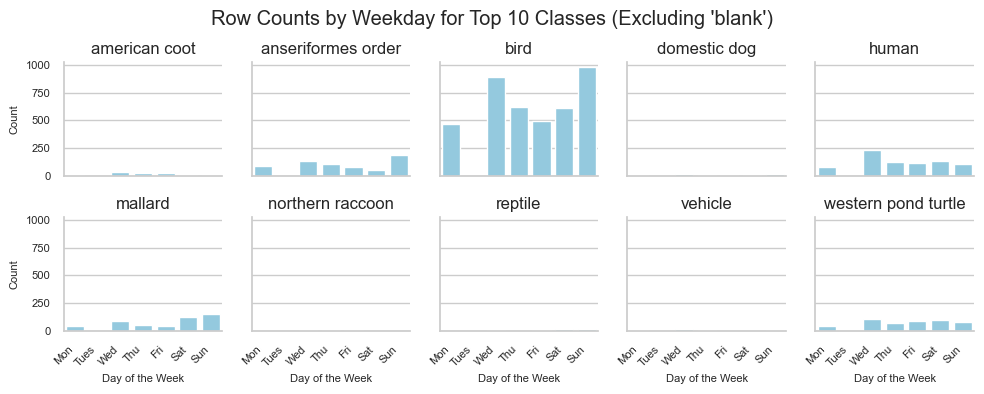

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out 'blank' class
filtered_df = merged_df[~merged_df['simple_class'].isin(['blank'])].copy()


# Get top 10 classes
top_classes = filtered_df['simple_class'].value_counts().head(10).index

# Filter to top classes
top_df = filtered_df[filtered_df['simple_class'].isin(top_classes)]

# Group and count rows by class and weekday
grouped = (
    top_df
    .groupby(['simple_class', 'weekday_short'])
    .size()
    .reset_index(name='count')
)

# Ensure all 7 weekdays exist for each class
weekday_order = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
grouped['weekday_short'] = pd.Categorical(grouped['weekday_short'], categories=weekday_order, ordered=True)

# Plot
sns.set(style="whitegrid")
g = sns.FacetGrid(
    grouped,
    col='simple_class',
    col_wrap=5,
    height=2,
    sharey=True
)

g.map_dataframe(
    sns.barplot,
    x='weekday_short',
    y='count',
    color='skyblue',
    order=weekday_order
)

for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha('right')

g.set_titles(col_template="{col_name}", fontsize=8)
g.set_axis_labels("Day of the Week", "Count", fontsize=8)



g.tight_layout()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Row Counts by Weekday for Top 10 Classes (Excluding 'blank')")
plt.show
